In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
from wordcloud import WordCloud


Carga de df

In [2]:
df_items = pd.read_csv('df_items.csv')
df_games = pd.read_csv('df_games.csv')
df_review = pd.read_csv('df_reviews.csv')


In [7]:
df_games.head()

,app_name,id,año,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Lost Summoner Kitty,761140,2018,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,Ironbound,643980,2018,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Real Pool 3D - Poolians,670290,2017,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,弹炸人2222,767400,2017,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,773570,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_items.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0


In [9]:
df_review.head()

,user_id,item_id,recommend,sentiment_analysis,año_publicado
0,76561197970982479,1250,True,2,2011
1,76561197970982479,22200,True,2,2011
2,76561197970982479,43110,True,2,2011
3,js41637,251610,True,2,2014
4,js41637,227300,True,0,2013


In [ ]:
df_combined = pd.merge(df_review, df_items, on='item_id')


Nube de palabras de titulos (columna 'app_name')

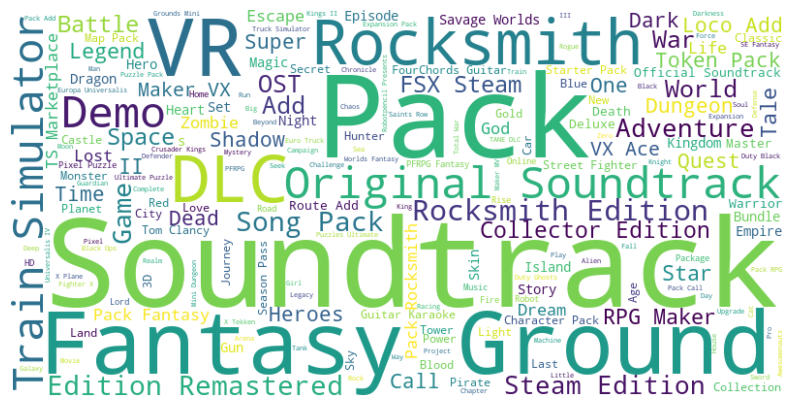

In [10]:
text = ' '.join(df_games['app_name'].astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Analisis de los generos

In [10]:
df_generos = df_games.drop(["app_name","id","año"],axis=1)

Distribucion general de los generos

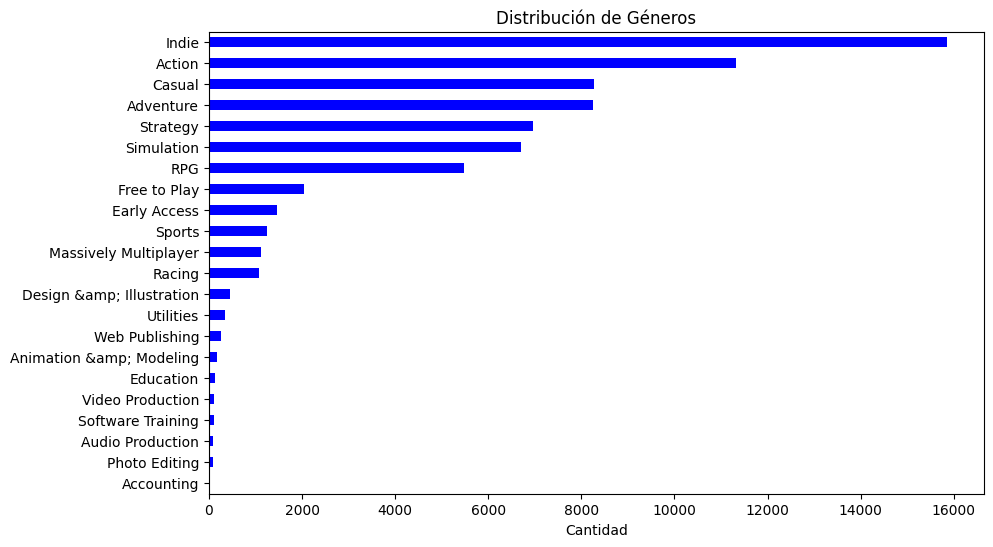

In [11]:

conteo_generos = df_generos.sum()

plt.figure(figsize=(10, 6))
conteo_generos.sort_values().plot(kind='barh', color='blue')

plt.xlabel('Cantidad')  # Etiqueta del eje x
plt.title('Distribución de Géneros')  # Título del gráfico

plt.show()

Division de lso generos por porcentaje

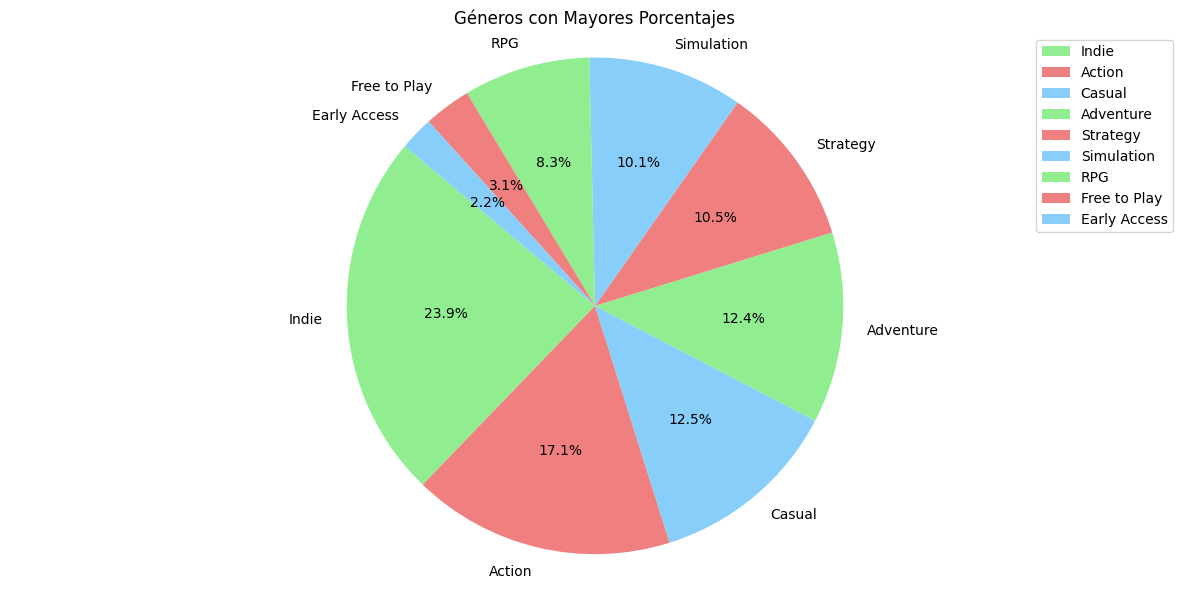

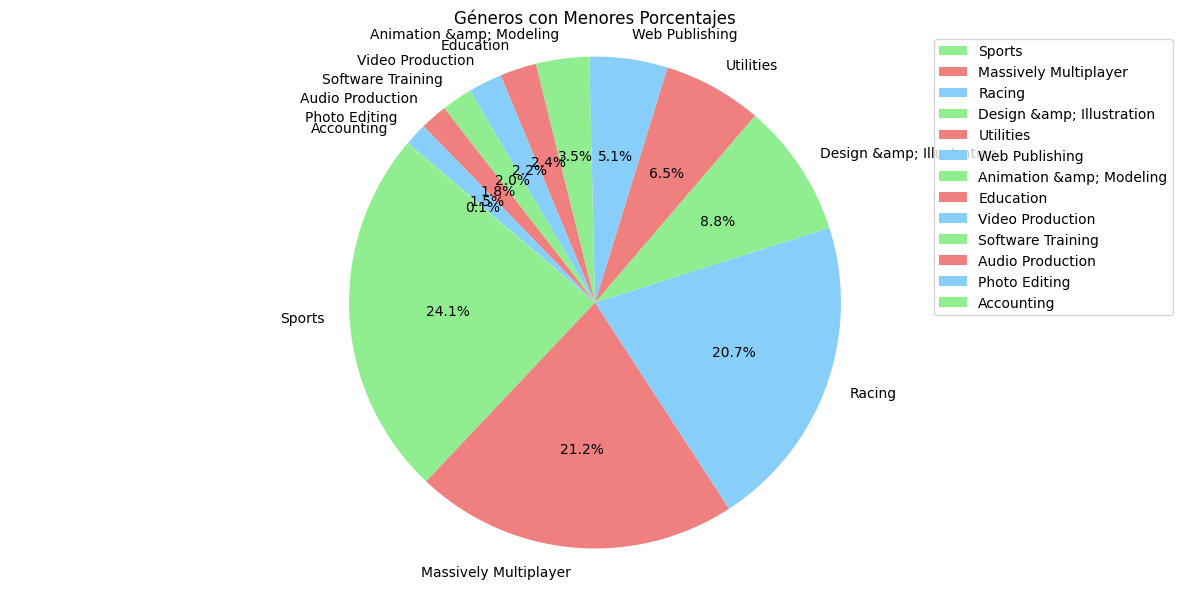

In [34]:
# Calcular la suma de cada género y los porcentajes
sum_genres = df_generos.sum()
percentages = (sum_genres / sum_genres.sum()) * 100

# Ordenar los géneros por porcentaje
sorted_genres = percentages.sort_values(ascending=False)

# Dividir los géneros en dos grupos (mayores y menores porcentajes)
top_genres = sorted_genres[sorted_genres >= 2]  
other_genres = sorted_genres[sorted_genres < 2]  

# Gráfico de torta para los géneros con mayores porcentajes
plt.figure(figsize=(12, 6))
top_genres.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'],
                shadow=False, startangle=140)
plt.title('Géneros con Mayores Porcentajes')
plt.ylabel('')
plt.legend(labels=top_genres.index, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Gráfico de torta para los géneros con menores porcentajes
plt.figure(figsize=(12, 6))
other_genres.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'],
                  shadow=False, startangle=140)
plt.title('Géneros con Menores Porcentajes')
plt.ylabel('')
plt.legend(labels=other_genres.index, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

El genero INDIE es el más popular, seguido por ACCION. Puntualmente se puede referir a que es la etiqueta más abarcativa y general para desrivir juegos por lo que se entiende que sea la más popular.
Los juego de ACCION, AVENTURA y ESTRATEGIA  son uno de los generos más poplares, dando un perfil de cual es el tipo de juego más consumido

Analisis de hoaras de juego

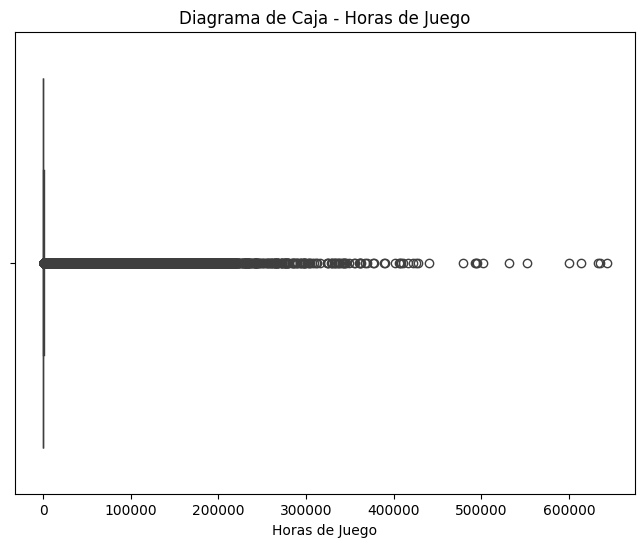

In [13]:
descripcion = df_items['playtime_forever'].describe()

# Diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_items['playtime_forever'])
plt.title('Diagrama de Caja - Horas de Juego')
plt.xlabel('Horas de Juego')
plt.show()

In [34]:


# Calcular la media
media = df_items['playtime_forever'].mean()

# Calcular la mediana
mediana = df_items['playtime_forever'].median()

# Calcular la desviación estándar
desviacion_estandar = df_items['playtime_forever'].std()

print('media:', (media))
print('mediana:', (mediana))
print('desviacionestandar:', (desviacion_estandar))



media: 991.4951407947941
mediana: 34.0
desviacionestandar: 5418.204404857233


Analsis de los datos de analsis de sentimiento


Datos de analisis de sentimiento por año

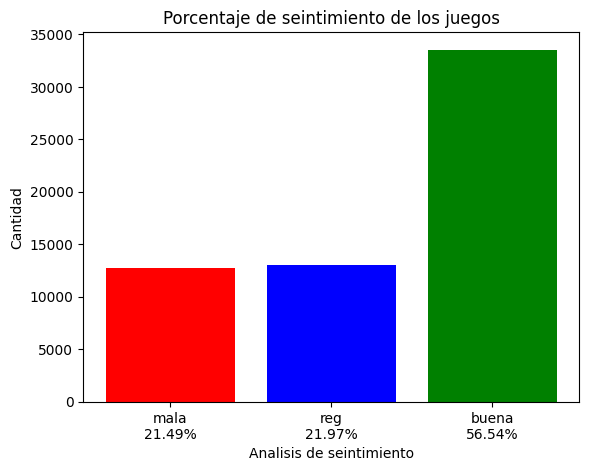

In [38]:

conteo_sentim = df_review['sentiment_analysis'].value_counts()

etiquetas = ['mala', 'reg', 'buena']
cantidad = [conteo_sentim[0], conteo_sentim[1], conteo_sentim[2]]


total = sum(cantidad)
porcentajes = [(valor / total) * 100 for valor in cantidad]
etiquetas_porcentaje = [f'{etiqueta}\n{porcentaje:.2f}%' for etiqueta, porcentaje in zip(etiquetas, porcentajes)]


plt.bar(etiquetas_porcentaje, cantidad, color=['red', 'blue', 'green'])
plt.xlabel('Analisis de seintimiento')
plt.ylabel('Cantidad')
plt.title('Porcentaje de seintimiento de los juegos')

plt.show()

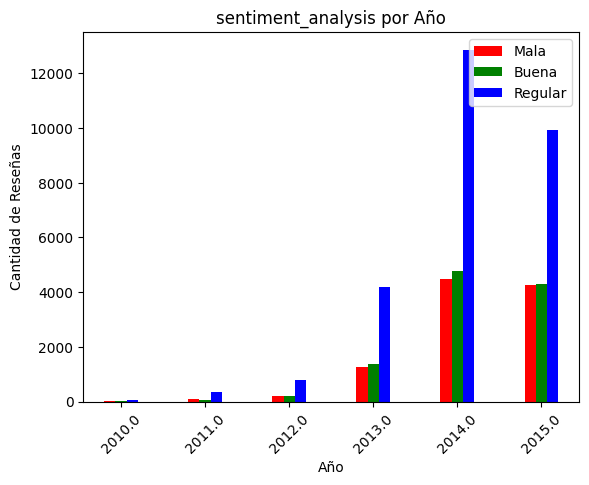

In [6]:

conteo_por_ano = df_review.groupby(['año_publicado', 'sentiment_analysis']).size().unstack(fill_value=0)


conteo_por_ano.plot(kind='bar', color=['red', 'green', 'blue'], width=0.4)


plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.title('sentiment_analysis por Año')

plt.xticks(rotation=45)
plt.legend(['Mala', 'Buena', 'Regular'], loc='upper right')
plt.show()


In [30]:
df_review[df_review['sentiment_analysis'] == 2].shape[0]

33531

In [29]:
df_review[df_review['sentiment_analysis'] == 1].shape[0]

13028

Analisis de los juegos recomendados 

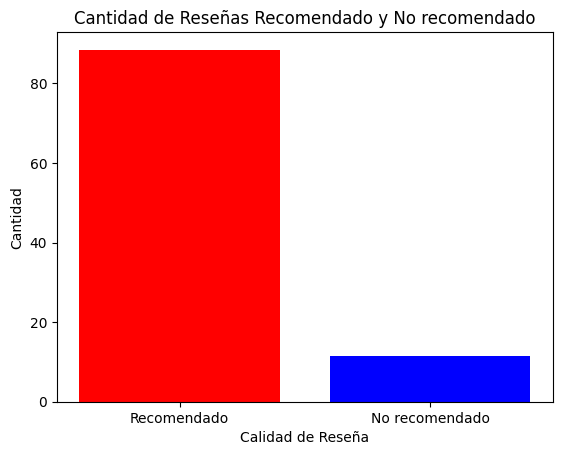

In [36]:

conteo_reseñas = df_review['recommend'].value_counts()


etiquetas = ['Recomendado', 'No recomendado']
cantidad = [conteo_reseñas[True], conteo_reseñas[False]]

plt.bar(etiquetas, cantidad, color=['red', 'blue'])
plt.xlabel('Calidad de Reseña')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reseñas Recomendado y No recomendado')


plt.show()



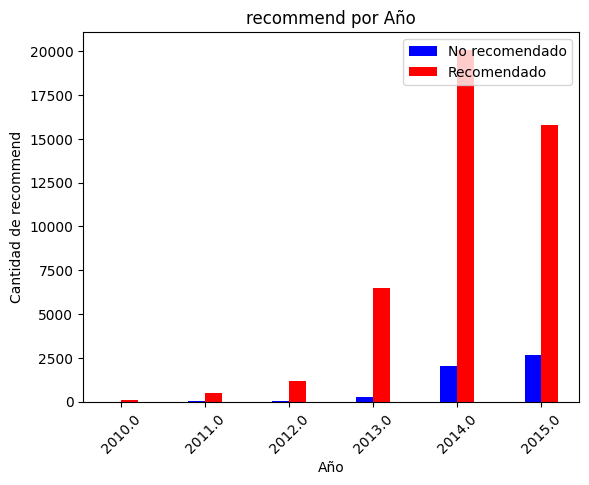

In [14]:
conteo_por_ano = df_review.groupby(['año_publicado', 'recommend']).size().unstack(fill_value=0)


conteo_por_ano.plot(kind='bar', color=['blue','red'], width=0.4)

plt.xlabel('Año')
plt.ylabel('Cantidad de recommend')
plt.title('recommend por Año')

plt.xticks(rotation=45)
plt.legend(['No recomendado','Recomendado'], loc='upper right')


plt.show()


In [16]:
# proporción de valores True en promedio en la columna 'recommend'
df_review['recommend'].mean()

0.8847989208329821

Juegos lanzados por año

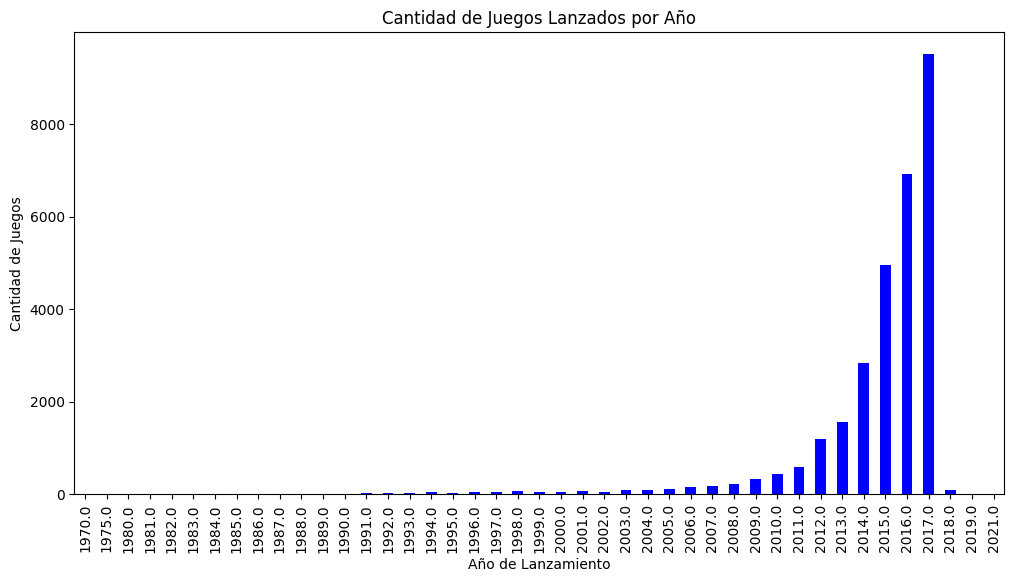

In [19]:
juegos_por_anio = df_games['año'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
juegos_por_anio.plot(kind='bar', color='blue')

# Estilización del gráfico
plt.xlabel('Año de Lanzamiento')  # Etiqueta del eje x
plt.ylabel('Cantidad de Juegos')  # Etiqueta del eje y
plt.title('Cantidad de Juegos Lanzados por Año')  # Título del gráfico

plt.show()